## Fetching Dataset

In [44]:
# ----importing library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [2]:
mnist= fetch_openml('mnist_784')

In [3]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [4]:
# ----So we also known that the features and labels so we convert the features and labels in to x and y shape 
x,y=mnist['data'],mnist['target']

In [5]:
# print(x)
# print(y)
x.shape
# y.shape

(70000, 784)

In [6]:
x0=np.array(x)

In [7]:
x0.dtype

dtype('float64')

In [8]:
%matplotlib inline

In [9]:
x1=x0[5101]

In [10]:
x1.shape

(784,)

In [11]:
x3=x1.reshape(28,28)

In [12]:
x3.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

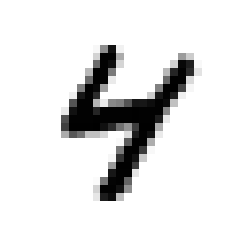

In [13]:
# ----plotting the graph
plt.imshow(x3,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

In [14]:
# ----checking the value by using target
y[3601]

'8'

In [15]:
x_train , x_test = x0[:6000],x0[6000:7000]

In [16]:
y_train, y_test = y[:6000], y[6000:7000]

In [17]:
# -----shuffiling the training dataset because we want to equally distributed data in training and testing
shuffle_index= np.random.permutation(6000)
y_train= y_train[shuffle_index]
x_train= x_train[shuffle_index]

## Creating a 2 Detector

In [18]:
# ----we creat a binary classification
# ----We simply check that the number is achully 2 or not
y_train=y_train.astype(np.int8)
y_test= y_test.astype(np.int8)
y_train_2= (y_train==2)
y_test_2 = (y_test==2)

In [19]:
# y_train_2
y_test_2

6000    False
6001    False
6002    False
6003    False
6004    False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: class, Length: 1000, dtype: bool

In [20]:
# ----Creating a classifier model
model=LogisticRegression(tol=0.1)

In [21]:
# -----Now fit the model
model.fit(x_train,y_train_2)

C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [22]:
# ----Now predicted the value
model.predict([x0[3689]])

array([False])

# Cross Validation

In [23]:
a=cross_val_score(model,x_train,y_train_2 ,cv=3,scoring='accuracy')

C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [24]:
a.mean()

0.9586666666666668

# # Pridicted Values

In [28]:
y_train_pred = cross_val_predict(model, x_train,y_train_2, cv=3)

C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [29]:
y_train_pred

array([False, False, False, ..., False,  True,  True])

## Calculating Confusion Matrix

In [33]:
confusion = confusion_matrix(y_train_2, y_train_pred)

In [34]:
print(confusion)

[[5288  131]
 [ 117  464]]


In [35]:
# -----Now we just check it that the perfect prediction
confusion_matrix(y_train_2, y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision and Recall

In [38]:
precision=precision_score(y_train_2, y_train_pred)

In [39]:
precision

0.7798319327731092

In [40]:
recall= recall_score(y_train_2, y_train_pred)
recall

0.7986230636833046

## F1-Scores

In [43]:
f1=f1_score(y_train_2,y_train_pred)
f1

0.7891156462585034

## Precision Recall Curve

In [49]:
# ----we need values noot bool so we use other method to check the threshholds and precision recall curve
y_scores=cross_val_predict(model,x_train,y_train_2,cv=3,method="decision_function")

C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TAYYAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [50]:
# precision,recalls, thresholds=precision_recall_curve(y_train_2,y_train_pred)
precision,recalls, thresholds=precision_recall_curve(y_train_2,y_scores)


In [51]:
# -----checking precision
precision

array([0.11047728, 0.1103081 , 0.11032909, ..., 1.        , 1.        ,
       1.        ])

In [52]:
# -----checking recall
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [53]:
# -----checking thresholds
thresholds

array([-195.36293879, -195.28852769, -195.11138641, ...,  186.56604863,
        196.3732484 ,  200.49950567])

## Plotting the Precision Recall Curve 

(0.0, 1.0)

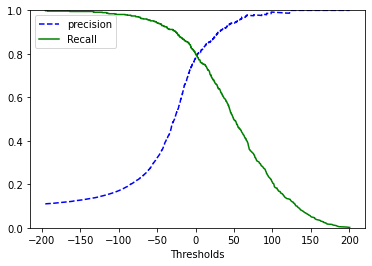

In [56]:
plt.plot(thresholds,precision[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g-",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])